# First attempt

In [43]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklift.models import SoloModel
from sklift import metrics
from sklift import viz

In [44]:
clients = pd.read_csv('clients2_modified.csv', index_col='client_id')
clients

,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,
000012768d,17383,17535,45.0,0,0,0
000036f903,17266,17279,72.0,1,0,0
00010925a5,17736,17788,83.0,0,0,0
0001f552b0,17347,17771,33.0,1,0,0
00020e7b18,17497,17541,73.0,0,0,0
...,...,...,...,...,...,...
fffe0abb97,17497,17573,35.0,1,0,0
fffe0ed719,17424,17512,69.0,0,0,0
fffea1204c,17562,17602,73.0,1,0,0


In [45]:
x_cols = clients.columns

In [46]:
df_full = pd.read_csv('train.csv', index_col='client_id')\
    .join(clients, how='left')
df_full

,treatment_flg,purchased,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,
ad6561e2d8,1,1,17503,17674,50.0,1,0,0
7c1ccbf93f,1,1,17480,17584,24.0,1,0,0
b58fadcab6,1,1,17472,17789,36.0,0,0,0
e99e6fabb9,0,0,17667,17681,79.0,1,0,0
27fb6f8520,1,1,17364,17515,34.0,1,0,0
...,...,...,...,...,...,...,...,...
999d284453,1,1,17835,17992,72.0,0,0,0
f634deea4e,0,1,17566,17602,35.0,0,0,0
16cb4f99b0,0,1,17585,18047,50.0,1,0,0


In [47]:
indices_train, indices_val = train_test_split(df_full.index, 
                                              test_size=0.2, 
                                              random_state=8)

In [48]:
indices_train.shape

(112021,)

In [49]:
indices_val.shape

(28006,)

In [50]:
X_train = df_full.loc[indices_train, x_cols]
X_train

,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,
fd1ab717e8,17774,17977,69.0,1,0,0
5be3f83065,17918,18036,67.0,1,0,0
1c48fc99b2,17319,17359,58.0,1,0,0
fcce9d3197,17370,17387,43.0,0,0,0
4f43f48cb7,17385,17842,42.0,0,0,0
...,...,...,...,...,...,...
c5792264c8,17424,17548,66.0,0,0,0
84880145bd,17895,17929,35.0,0,1,0
49eb365a88,17323,17566,20.0,0,1,0


In [51]:
treat_train = df_full.loc[indices_train, 'treatment_flg']
treat_train

client_id
fd1ab717e8    1
5be3f83065    1
1c48fc99b2    0
fcce9d3197    1
4f43f48cb7    0
             ..
c5792264c8    0
84880145bd    0
49eb365a88    0
1b55a9f080    1
9961481e46    1
Name: treatment_flg, Length: 112021, dtype: int64

In [52]:
y_train = df_full.loc[indices_train, 'purchased']
y_train

client_id
fd1ab717e8    1
5be3f83065    0
1c48fc99b2    1
fcce9d3197    1
4f43f48cb7    1
             ..
c5792264c8    1
84880145bd    1
49eb365a88    0
1b55a9f080    0
9961481e46    1
Name: purchased, Length: 112021, dtype: int64

In [53]:
X_val = df_full.loc[indices_val, x_cols]
X_val

,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,
c0582c1d5e,17570,17748,56.0,0,0,0
9a96a00f1d,17369,17482,64.0,1,0,0
55bca71943,17641,18220,32.0,0,0,1
5bb5a27171,17353,17426,41.0,1,0,0
d9c7b97fba,17323,17933,42.0,0,1,0
...,...,...,...,...,...,...
f68c84f07b,17847,18220,19.0,0,1,1
704cff2628,17529,17643,42.0,0,0,0
feff930002,17371,17583,29.0,1,0,0


In [54]:
treat_val = df_full.loc[indices_val, 'treatment_flg']
treat_val

client_id
c0582c1d5e    1
9a96a00f1d    0
55bca71943    0
5bb5a27171    0
d9c7b97fba    0
             ..
f68c84f07b    0
704cff2628    1
feff930002    1
fa31a8a3bb    0
cf760d447c    1
Name: treatment_flg, Length: 28006, dtype: int64

In [55]:
y_val = df_full.loc[indices_val, 'purchased']
y_val

client_id
c0582c1d5e    1
9a96a00f1d    1
55bca71943    0
5bb5a27171    1
d9c7b97fba    0
             ..
f68c84f07b    1
704cff2628    1
feff930002    1
fa31a8a3bb    0
cf760d447c    1
Name: purchased, Length: 28006, dtype: int64

# Model

In [56]:
solo = SoloModel(XGBClassifier(random_state=8))

In [57]:
%%time
solo = solo.fit(X_train, y_train, treat_train)

/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:22:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 7.59 s, sys: 158 ms, total: 7.75 s
Wall time: 2.11 s


# Checking on the validation test

In [58]:
y_pred_val = solo.predict(X_val)
y_pred_val

array([ 0.04003203,  0.05049574,  0.00092408, ...,  0.00872415,
       -0.01073822,  0.0151456 ], dtype=float32)

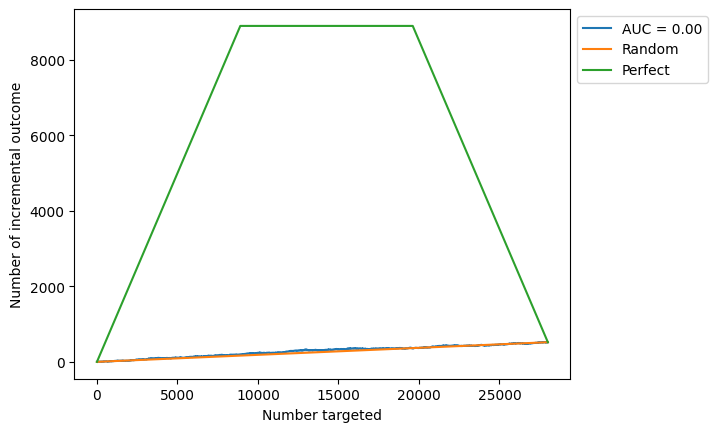

In [60]:
viz.plot_qini_curve(y_val, y_pred_val, treat_val);

In [61]:
y_pred_train = solo.predict(X_train)
y_pred_train

array([0.0095163 , 0.00866163, 0.02977747, ..., 0.07088381, 0.05960587,
       0.05579561], dtype=float32)

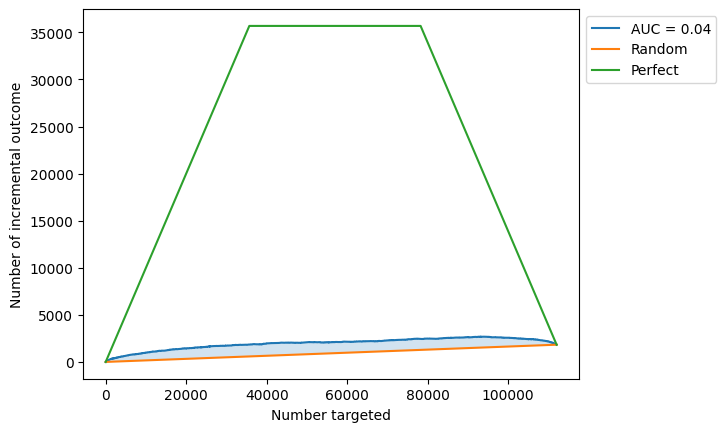

In [62]:
viz.plot_qini_curve(y_train, y_pred_train, treat_train);

In [64]:
metrics.qini_auc_score(y_val, y_pred_val, treat_val)

0.0037765470715196937

In [65]:
metrics.qini_auc_score(y_train, y_pred_train, treat_train)

0.04368808113714047

# Prediction on the test set

In [76]:
X_test = pd.read_csv('test.csv', index_col='client_id')\
    .join(clients, how='left')
X_test

,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,
a9a604ed6e,17787,18220,36.000000,1,0,1
ebd7360016,17350,17410,63.000000,1,0,0
908cd9b8e8,17620,17725,49.000000,1,0,0
dceb8ce861,17445,17754,46.000000,0,0,0
f4f0ac6b06,17709,17942,46.379533,0,0,0
...,...,...,...,...,...,...
4762fb04c5,17682,17891,26.000000,0,1,0
533d1516e7,17438,17538,37.000000,0,1,0
c93b21a707,17807,17985,42.000000,0,0,0


In [71]:
y_pred_test = solo.predict(X_test); y_pred_test

array([ 0.00163336,  0.04192746,  0.04948241, ..., -0.01879102,
        0.01267904,  0.01927042], dtype=float32)

In [77]:
X_test['pred'] = y_pred_test
X_test

,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem,pred
client_id,,,,,,,
a9a604ed6e,17787,18220,36.000000,1,0,1,0.001633
ebd7360016,17350,17410,63.000000,1,0,0,0.041927
908cd9b8e8,17620,17725,49.000000,1,0,0,0.049482
dceb8ce861,17445,17754,46.000000,0,0,0,0.008340
f4f0ac6b06,17709,17942,46.379533,0,0,0,0.029117
...,...,...,...,...,...,...,...
4762fb04c5,17682,17891,26.000000,0,1,0,0.154825
533d1516e7,17438,17538,37.000000,0,1,0,0.022499
c93b21a707,17807,17985,42.000000,0,0,0,-0.018791


In [79]:
X_test.pred.to_csv('submit.csv')

# Feature importance

In [89]:
pd.DataFrame({'value':solo.estimator.get_booster().get_score(importance_type='gain')})

,value
age,3.451518
first_issue_date,3.461259
first_redeem_date,10.085103
gender_F,2.800643
gender_M,3.232283
treatment,3.746569
